In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

In [5]:
data = pd.read_csv("data/events.csv", low_memory=False)

In [16]:
cc = data[ (data['event']=='conversion') | (data['event']=='checkout') ]

In [17]:
a = cc.groupby('person')

In [18]:
a.get_group('00204059')

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
137,2018-02-01 23:33:52,checkout,00204059,NaN,2699.0,iPhone 5s,Bom,16GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,2018-02-15 22:10:01,checkout,00204059,NaN,2682.0,iPhone 5c,Bom,16GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,2018-02-16 00:25:21,checkout,00204059,NaN,2683.0,iPhone 5c,Bom,16GB,Rosa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,2018-02-16 00:27:43,checkout,00204059,NaN,2682.0,iPhone 5c,Bom,16GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,2018-05-19 03:36:24,checkout,00204059,NaN,9441.0,Samsung Galaxy A7 2016,Muito Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pg = pd.DataFrame()
pg['person'] = data['person']
pg['checkout'] = data['event']
pg['conversion'] = pg['checkout'].str.contains('conversion')
pg['ad campaign hit'] = pg['checkout'].str.contains('ad campaign hit')
pg['viewed product'] = pg['checkout'].str.contains('viewed product')
pg['visited site'] = pg['checkout'].str.contains('visited site')


pg['checkout'] = pg['checkout'].str.contains('checkout')
grpg = pg.groupby('person').sum()
grpg

#iphone['5'] = iphone['model'].str.contains('5', case=False) 

,checkout,conversion,ad campaign hit,viewed product,visited site
person,,,,,
0004b0a2,1.0,0.0,1.0,1.0,1.0
0006a21a,1.0,0.0,1.0,1.0,1.0
000a54b2,1.0,0.0,2.0,19.0,2.0
00184bf9,4.0,0.0,0.0,36.0,2.0
0019c395,1.0,0.0,2.0,2.0,1.0
001bb7eb,1.0,0.0,1.0,2.0,2.0
001f1653,1.0,0.0,1.0,1.0,1.0
00204059,5.0,1.0,6.0,44.0,12.0
0020f73c,1.0,0.0,0.0,0.0,0.0


/home/miki_mustard/envdatos/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

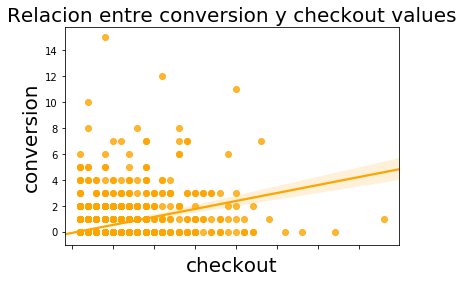

In [24]:
g = sns.regplot(x="checkout", y="conversion", 
                    data=grpg, color="orange")
g.set_title("Relacion entre conversion y checkout values", fontsize=20)
g.set_xlabel("checkout", fontsize=20)
g.set_ylabel("conversion", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

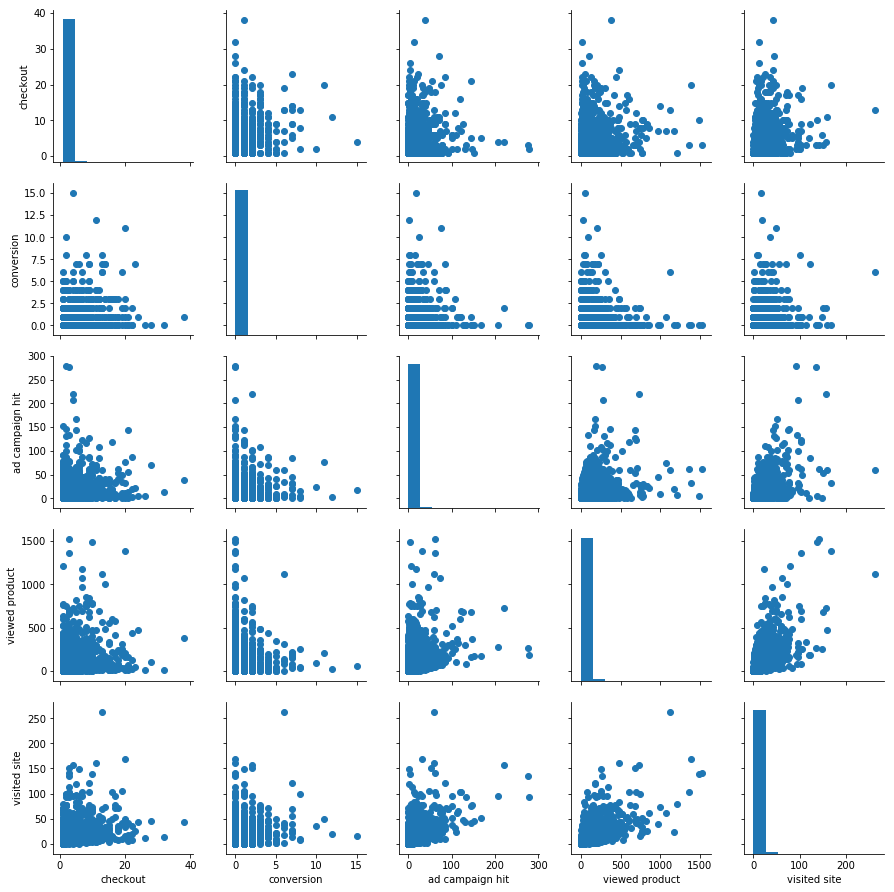

In [34]:
#Por persona
g = sns.PairGrid(grpg)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [43]:
pg = pd.DataFrame()
pg['date'] = data['timestamp'].dt.date
pg['checkout'] = data['event']
pg['conversion'] = pg['checkout'].str.contains('conversion')
pg['ad campaign hit'] = pg['checkout'].str.contains('ad campaign hit')
pg['viewed product'] = pg['checkout'].str.contains('viewed product')
pg['visited site'] = pg['checkout'].str.contains('visited site')

pg['checkout'] = pg['checkout'].str.contains('checkout')
grpg = pg.groupby('date').sum()
grpg

,checkout,conversion,ad campaign hit,viewed product,visited site
date,,,,,
2018-01-01,0.0,0.0,5.0,6.0,7.0
2018-01-02,5.0,0.0,20.0,122.0,20.0
2018-01-03,3.0,0.0,34.0,263.0,30.0
2018-01-04,9.0,2.0,43.0,250.0,35.0
2018-01-05,8.0,3.0,48.0,510.0,49.0
2018-01-06,7.0,0.0,21.0,179.0,28.0
2018-01-07,11.0,2.0,50.0,171.0,38.0
2018-01-08,12.0,3.0,48.0,210.0,50.0
2018-01-09,19.0,3.0,71.0,431.0,65.0


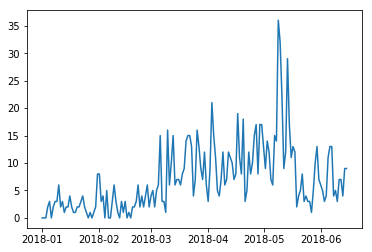

In [45]:
plt.plot(grpg.index, grpg['conversion'])   

In [28]:
pg = pd.DataFrame()
pg['date'] = data['timestamp'].dt.date
pg['checkout'] = data['event']
pg['conversion'] = pg['checkout'].str.contains('conversion')
pg['ad campaign hit'] = pg['checkout'].str.contains('ad campaign hit')
pg['viewed product'] = pg['checkout'].str.contains('viewed product')
pg['visited site'] = pg['checkout'].str.contains('visited site')

pg['checkout'] = pg['checkout'].str.contains('checkout')
grpg = pg.groupby('date').sum()
grpg

,checkout,conversion,ad campaign hit,viewed product,visited site
date,,,,,
2018-01-01,0.0,0.0,5.0,6.0,7.0
2018-01-02,5.0,0.0,20.0,122.0,20.0
2018-01-03,3.0,0.0,34.0,263.0,30.0
2018-01-04,9.0,2.0,43.0,250.0,35.0
2018-01-05,8.0,3.0,48.0,510.0,49.0
2018-01-06,7.0,0.0,21.0,179.0,28.0
2018-01-07,11.0,2.0,50.0,171.0,38.0
2018-01-08,12.0,3.0,48.0,210.0,50.0
2018-01-09,19.0,3.0,71.0,431.0,65.0


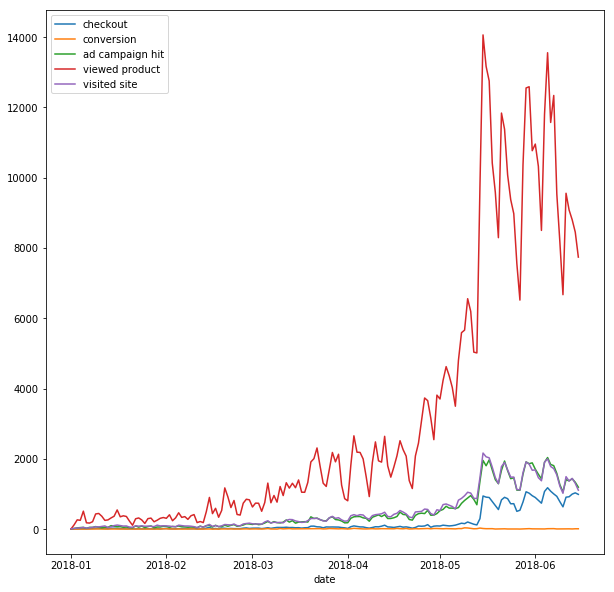

In [76]:
#ax = sns.lineplot(x=grpg.index, y=grpg[''])
ax = grpg.plot(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7de9ea6048>,
      dtype=object)

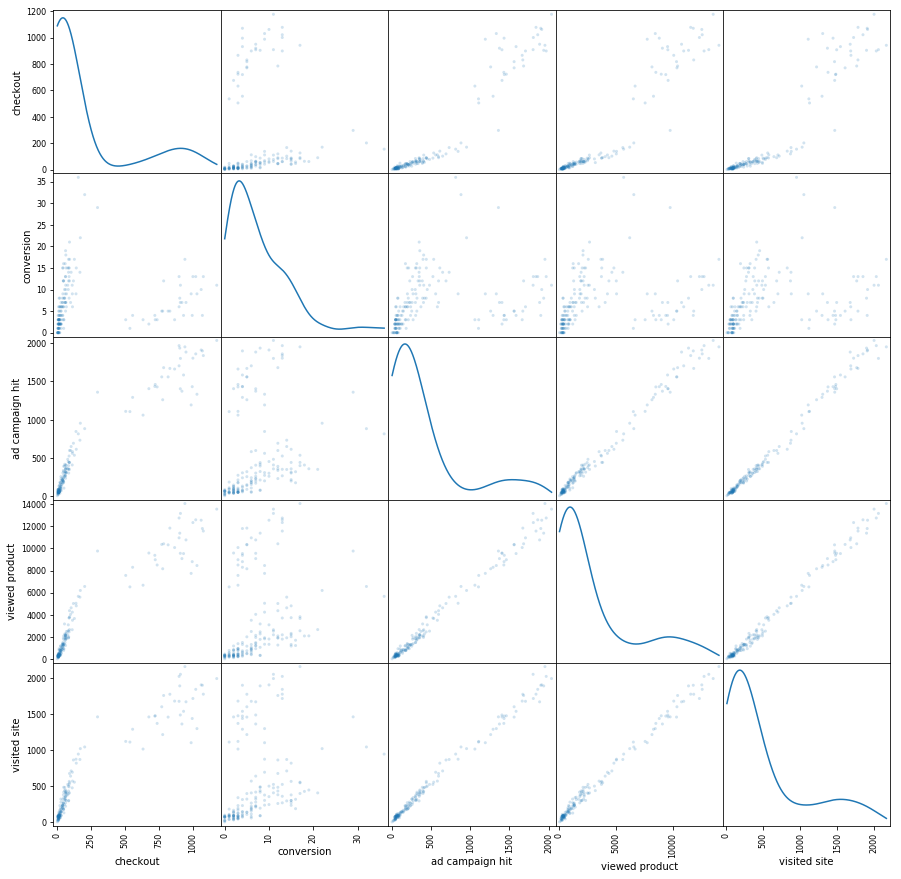

In [29]:
from pandas.plotting import scatter_matrix
#En general por fecha
scatter_matrix(grpg, alpha=0.2, figsize=(15, 15), diagonal='kde')

In [6]:
usuarios = data['person']

In [7]:
data.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
user_with_most_activity = usuarios.value_counts().head(10)

In [9]:
productos = data[['sku','event']]

In [56]:
productos_filtered = productos[productos['event'] == 'conversion']
productos_filtered.head(10)

,sku,event
220,3084.0,conversion
2282,6650.0,conversion
2547,3348.0,conversion
4245,2694.0,conversion
6985,6357.0,conversion
10005,3203.0,conversion
14236,3301.0,conversion
15278,15745.0,conversion
16800,2830.0,conversion
18502,6370.0,conversion


In [45]:
prod_grouped = productos_filtered.groupby(['sku'], as_index=False).agg("count")

In [12]:
prod_with_most_conversions = prod_grouped.sort_values(by='event',ascending=False).head(5)

In [13]:
eventos = data['event']

In [47]:
result_eventos = eventos.value_counts()
result_eventos

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [15]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

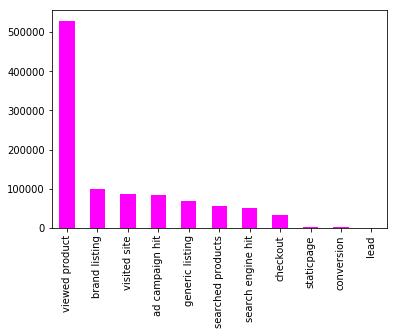

In [16]:
result_eventos.plot(kind='bar', colormap='spring');

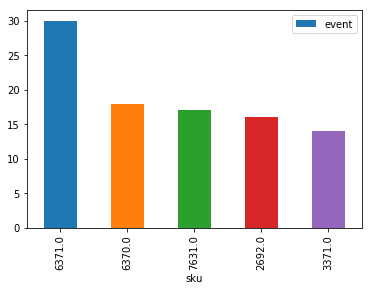

In [17]:
prod_with_most_conversions.plot(x='sku', y='event',kind='bar')

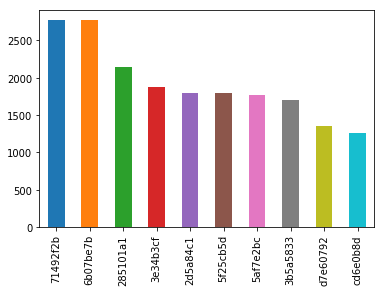

In [18]:
user_with_most_activity.plot(kind='bar')

In [22]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [5]:
#data['skus'].value_counts()

In [7]:
#data[ data['sku'] == '2820']

In [10]:
grouped_vs = data.groupby(['person'])['event'].sum()
apply = grouped_vs.apply( lambda x: ("visited site" in x) & ("viewed product" in x) )
apply.value_counts()

True     26133
False     1491
Name: event, dtype: int64

In [11]:
#cant_pers_dif = data['person'].drop_duplicates()
#cant_pers_dif

In [18]:
data['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [15]:
#data['sku'].value_counts()

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [16]:
#timestamp = data['timestamp']
#timestamp.value_counts()

In [11]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['weekday'] = data['timestamp'].dt.day_name()
data['hour'] = data['timestamp'].dt.hour
campaña = data[['year','month','day','weekday','hour','event', 'campaign_source', 'url', 'person']]
campaña = campaña[campaña['event'] == 'ad campaign hit']
data.head(2)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,country,device_type,screen_resolution,operating_system_version,browser_version,year,month,day,weekday,hour
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,31,Thursday,23
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018,5,31,Thursday,23


In [16]:
data['month'].describe()

count    1.011288e+06
mean     4.838374e+00
std      1.113527e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      6.000000e+00
Name: month, dtype: float64

In [22]:
campaña.head(5)

,year,month,day,weekday,hour,event,campaign_source,url,person
0,2018,5,31,Thursday,23,ad campaign hit,criteo,/comprar/iphone/iphone-5s,0004b0a2
6,2018,5,29,Tuesday,13,ad campaign hit,criteo,/comprar/samsung/galaxy-s8,0006a21a
11,2018,4,9,Monday,20,ad campaign hit,google,/,000a54b2
15,2018,5,24,Thursday,11,ad campaign hit,google,/,000a54b2
99,2018,5,17,Thursday,0,ad campaign hit,google,/comprar/samsung/galaxy-j5,0019c395


Para que podria servir?

In [20]:
source = campaña.groupby(['campaign_source', 'month', 'day', 'hour'])['person'].count()
source

campaign_source  month  day  hour
Facebook         2      15   3       1
                        27   20      1
                 3      21   13      2
                        22   1       5
                             2       3
                        27   14      1
                             18      1
                 4      13   11      1
                        19   10      1
                        25   13      1
                        29   21      3
                 5      1    11      5
                        4    10      1
                        7    13      1
                             22      4
                             23      1
                        10   22      2
                        15   9       2
                             15      1
                        17   15      1
                        18   3       1
                        19   19      1
                        20   15      1
                        22   16      2
                        26   3

In [6]:
campaign_source_vacio = campaña[ campaña['campaign_source'].isna() ]
campaign_source_vacio

,year,month,day,weekday,hour,event,campaign_source
47330,2018,3,23,Friday,20,ad campaign hit,NaN
51231,2018,4,23,Monday,15,ad campaign hit,NaN
57113,2018,1,9,Tuesday,22,ad campaign hit,NaN
57116,2018,1,10,Wednesday,1,ad campaign hit,NaN
57118,2018,1,10,Wednesday,1,ad campaign hit,NaN
97778,2018,4,10,Tuesday,22,ad campaign hit,NaN
104823,2018,4,9,Monday,19,ad campaign hit,NaN
123558,2018,5,6,Sunday,23,ad campaign hit,NaN
129917,2018,3,21,Wednesday,0,ad campaign hit,NaN
129918,2018,3,21,Wednesday,0,ad campaign hit,NaN


In [8]:
campaña['month'].value_counts()

5    38108
6    22917
4    10888
3     6872
2     2340
1     1702
Name: month, dtype: int64

In [22]:
grouped = campaña.groupby(['month','day'])['person'].count()
grouped

month  day
1      1         5
       2        20
       3        34
       4        43
       5        48
       6        21
       7        50
       8        48
       9        71
       10       50
       11       37
       12       54
       13       48
       14       98
       15       81
       16       66
       17       69
       18       51
       19       57
       20       44
       21       38
       22       90
       23       55
       24       85
       25       42
       26       71
       27       90
       28       38
       29       59
       30       59
              ... 
5      17     1969
       18     1681
       19     1406
       20     1292
       21     1671
       22     1937
       23     1663
       24     1435
       25     1461
       26     1109
       27     1106
       28     1560
       29     1912
       30     1861
       31     1885
6      1      1705
       2      1560
       3      1429
       4      1900
       5      2037
       6      1839
 

In [62]:
grouped2 = campaña.groupby(['month','day'])['hour'].value_counts()
grouped2

month  day  hour
1      1    22        2
            7         1
            18        1
            23        1
       2    14        9
            4         4
            19        2
            0         1
            2         1
            11        1
            13        1
            18        1
       3    1         8
            12        5
            23        5
            13        3
            19        3
            0         2
            16        2
            17        2
            22        2
            18        1
            21        1
       4    12        8
            15        5
            3         4
            14        4
            22        3
            23        3
            0         2
                   ... 
6      14   4        11
            9        10
            5         9
            7         8
            8         8
            6         5
       15   16      113
            14       81
            17       78
            22       75

In [60]:
filtrado = campaña[campaña['month'] == 1]
filtrado = campaña[campaña['day'] == 1]
filtrado

,year,month,day,weekday,hour,event
132,2018,2,1,Thursday,23,ad campaign hit
135,2018,2,1,Thursday,23,ad campaign hit
139,2018,2,1,Thursday,23,ad campaign hit
141,2018,2,1,Thursday,23,ad campaign hit
700,2018,6,1,Friday,19,ad campaign hit
701,2018,6,1,Friday,22,ad campaign hit
707,2018,6,1,Friday,23,ad campaign hit
1321,2018,6,1,Friday,1,ad campaign hit
1326,2018,6,1,Friday,3,ad campaign hit
1329,2018,6,1,Friday,3,ad campaign hit


In [63]:
grouped = campaña.groupby(['month','day'])['hour'].count()
campaña['entradas por dia y mes'] = grouped.reset_index(drop=True)
campaña.head(3)

,year,month,day,weekday,hour,event,entradas por dia y mes
0,2018,5,31,Thursday,23,ad campaign hit,5.0
6,2018,5,29,Tuesday,13,ad campaign hit,50.0
11,2018,4,9,Monday,20,ad campaign hit,54.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 28 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region            

In [10]:
data['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [11]:
campaign_url_vacio = campaña[ campaña['url'].isna() ]
campaign_url_vacio

,year,month,day,weekday,hour,event,campaign_source,url
14218,2018,1,9,Tuesday,16,ad campaign hit,google,NaN
30468,2018,5,27,Sunday,22,ad campaign hit,zanox,NaN
48953,2018,6,8,Friday,14,ad campaign hit,zanox,NaN
61503,2018,1,4,Thursday,14,ad campaign hit,google,NaN
123554,2018,5,6,Sunday,23,ad campaign hit,zanox,NaN
135797,2018,4,5,Thursday,1,ad campaign hit,zanox,NaN
141027,2018,1,4,Thursday,20,ad campaign hit,google,NaN
141041,2018,1,4,Thursday,20,ad campaign hit,google,NaN
156359,2018,5,6,Sunday,6,ad campaign hit,zanox,NaN
156364,2018,5,6,Sunday,6,ad campaign hit,zanox,NaN


In [22]:
url = campaña['url'].value_counts()
url = url[ url.index != '/']
url = url[ url.values > 300]
url

/comprar/iphone                                4132
/comprar/iphone/6s                             3393
/comprar/iphone/6                              3228
/comprar/samsung                               2782
/comprar/iphone/iphone-5s                      2689
/comprar/samsung/galaxy-j5                     2446
/comprar/samsung/galaxy-s7-edge                1972
/comprar/samsung/galaxy-s8                     1499
/comprar/samsung/galaxy-j7                     1465
/comprar/samsung/galaxy-s6-edge                1415
/comprar/motorola                              1154
/comprar/samsung/galaxy-s7                     1139
/comprar/iphone/7                              1120
/comprar/samsung/galaxy-s6-flat                1067
/comprar/iphone/iphone-6s-plus                  947
/comprar/samsung/samsung-gran-prime-duos-tv     944
/comprar/samsung/a5                             906
/comprar/samsung/                               902
/comprar/samsung/galaxy-s8-plus                 849
/comprar/iph

Text(0,0.5,'Url')

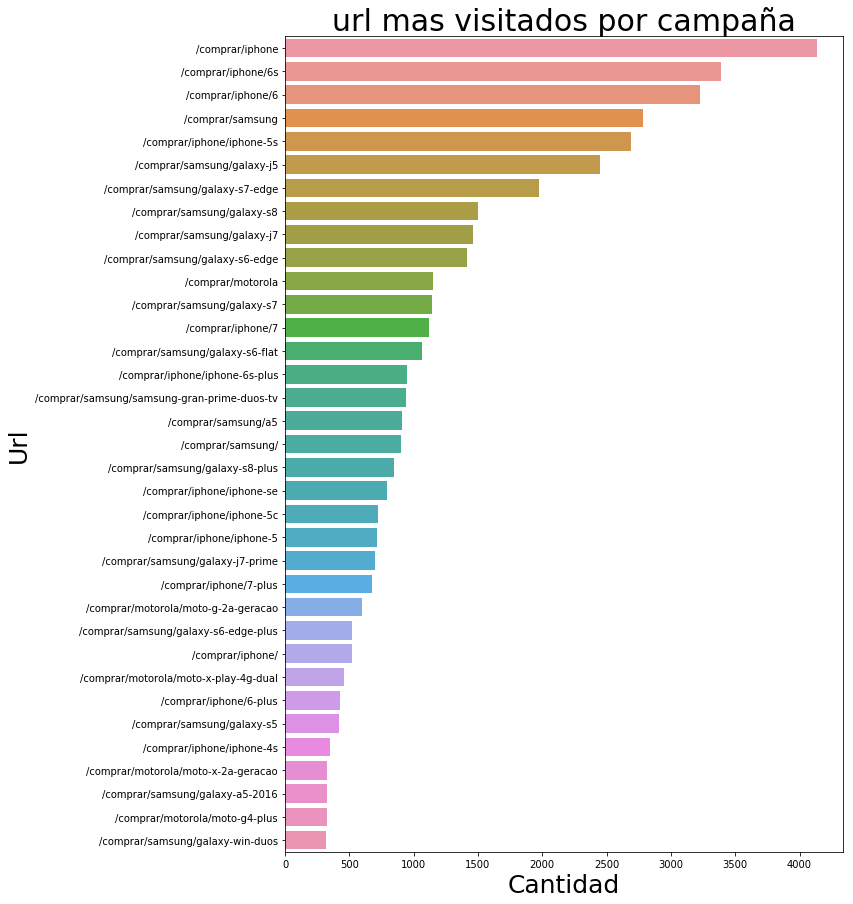

In [25]:
plt.figure(figsize=(10, 15))
g = sns.barplot(x=url.values, y=url.index, orient='h')
g.set_title("url mas visitados por campaña", fontsize=30)
g.set_xlabel("Cantidad", fontsize=25)
g.set_ylabel("Url", fontsize=25)

In [30]:
campaña_filtered.groupby(['month']).head(12)

,year,month,day,weekday,hour,event,dias por mes
0,2018,5,31,Thursday,23,ad campaign hit,1
6,2018,5,29,Tuesday,13,ad campaign hit,1
11,2018,4,9,Monday,20,ad campaign hit,2
15,2018,5,24,Thursday,11,ad campaign hit,3
99,2018,5,17,Thursday,0,ad campaign hit,NaN
101,2018,5,17,Thursday,0,ad campaign hit,NaN
107,2018,6,8,Friday,12,ad campaign hit,NaN
111,2018,5,29,Tuesday,12,ad campaign hit,NaN
119,2018,1,31,Wednesday,16,ad campaign hit,NaN
132,2018,2,1,Thursday,23,ad campaign hit,NaN


In [69]:
for_heatmap = campaña.pivot_table(index='month', columns='day', values='hour', aggfunc='count')
for_heatmap

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,5.0,20.0,34.0,43.0,48.0,21.0,50.0,48.0,71.0,50.0,...,90.0,55.0,85.0,42.0,71.0,90.0,38.0,59.0,59.0,80.0
2,75.0,48.0,75.0,67.0,89.0,68.0,62.0,52.0,58.0,53.0,...,107.0,128.0,80.0,95.0,115.0,152.0,145.0,NaN,NaN,NaN
3,132.0,150.0,126.0,138.0,174.0,216.0,173.0,212.0,184.0,175.0,...,314.0,266.0,240.0,234.0,319.0,351.0,272.0,260.0,230.0,177.0
4,181.0,308.0,350.0,357.0,357.0,320.0,305.0,224.0,336.0,372.0,...,255.0,390.0,439.0,453.0,441.0,535.0,394.0,399.0,441.0,NaN
5,525.0,560.0,649.0,597.0,597.0,582.0,613.0,732.0,815.0,883.0,...,1937.0,1663.0,1435.0,1461.0,1109.0,1106.0,1560.0,1912.0,1861.0,1885.0
6,1705.0,1560.0,1429.0,1900.0,2037.0,1839.0,1805.0,1585.0,1261.0,1060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(141,0.5,'Mes de la entrada')

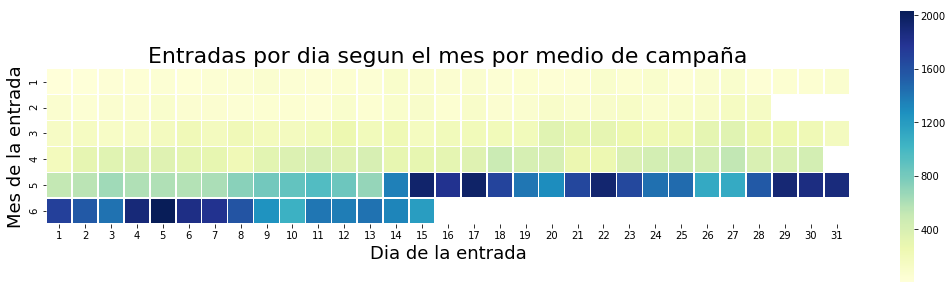

In [95]:
plt.figure(figsize=(18, 5))
g = sns.heatmap(for_heatmap,  cmap="YlGnBu",square=True,  linewidths=.5)
g.set_title("Entradas por dia segun el mes por medio de campaña", fontsize=22)
g.set_xlabel("Dia de la entrada",fontsize=18)
g.set_ylabel("Mes de la entrada", fontsize=18)

In [97]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'year', 'month', 'day',
       'weekday', 'hour'],
      dtype='object')

In [98]:
data['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [106]:
usuarios_nuevos = data[ data['new_vs_returning'] == 'New']
usuarios_nuevos['person'].value_counts()

e8832441    1
762a4108    1
811e97ed    1
1d0c6540    1
338b6352    1
f52fac6e    1
b406a544    1
b4a48963    1
ad70cce8    1
d0151c96    1
31843a05    1
e6c89b93    1
f6998feb    1
98ab9a51    1
716b9587    1
a39d78f7    1
e1b5a3bc    1
9b964c9f    1
788c452b    1
86086823    1
d8f560d2    1
9f6e9abe    1
54a893fa    1
b4899ef7    1
b28b8293    1
39e8638e    1
847ce0d1    1
a24317ab    1
e6cb52aa    1
45ad8628    1
           ..
91b6f8c5    1
943b9717    1
fd70a1dd    1
6d7b58ef    1
b84c447b    1
26f7ead3    1
4413d549    1
44ced10f    1
96bb4ead    1
243d48d6    1
1fb7a586    1
fc4ccf8b    1
37867e8f    1
ba07828d    1
9bfe7c40    1
a1ecfbd1    1
aec02958    1
cb5d6fb1    1
68f9f27d    1
9ef63ab3    1
0a4f87b6    1
48d27a92    1
ac01b499    1
c5a8ee57    1
815f8e2a    1
f8d9191d    1
97c82d5f    1
3cb1ba73    1
64ed93a9    1
0358de91    1
Name: person, Length: 26898, dtype: int64

In [107]:
for_heatmap2 = usuarios_nuevos.pivot_table(index='month', columns='day', values='person', aggfunc='count')
for_heatmap2

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,5.0,13.0,21.0,23.0,24.0,13.0,15.0,17.0,15.0,16.0,...,17.0,17.0,11.0,20.0,23.0,20.0,12.0,15.0,18.0,18.0
2,12.0,15.0,11.0,11.0,17.0,16.0,17.0,16.0,13.0,14.0,...,23.0,17.0,19.0,21.0,28.0,28.0,25.0,NaN,NaN,NaN
3,25.0,26.0,38.0,21.0,39.0,25.0,31.0,34.0,28.0,25.0,...,42.0,52.0,28.0,32.0,47.0,63.0,41.0,39.0,37.0,29.0
4,34.0,51.0,65.0,30.0,53.0,54.0,34.0,42.0,71.0,38.0,...,53.0,65.0,72.0,67.0,81.0,70.0,62.0,57.0,96.0,NaN
5,66.0,104.0,90.0,96.0,93.0,78.0,117.0,135.0,137.0,142.0,...,735.0,680.0,570.0,620.0,419.0,427.0,681.0,852.0,768.0,683.0
6,754.0,621.0,575.0,878.0,932.0,847.0,710.0,707.0,596.0,484.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(141,0.5,'Mes de la entrada')

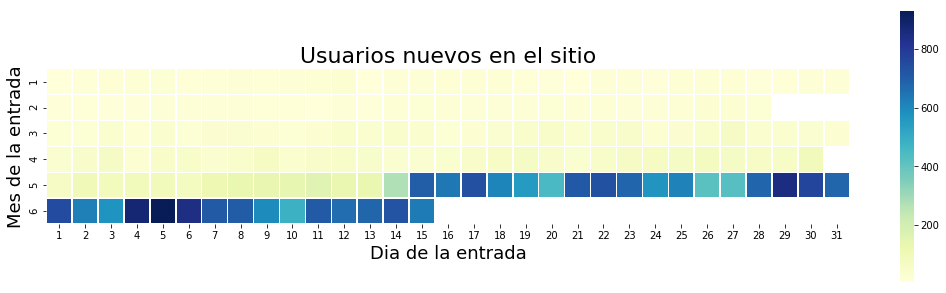

In [109]:
plt.figure(figsize=(18, 5))
g2 = sns.heatmap(for_heatmap2,  cmap="YlGnBu",square=True,  linewidths=.5)
g2.set_title("Usuarios nuevos en el sitio", fontsize=22)
g2.set_xlabel("Dia de la entrada",fontsize=18)
g2.set_ylabel("Mes de la entrada", fontsize=18)

In [111]:
usuarios_nuevos_por_mes = usuarios_nuevos.groupby(['month'])['day'].count()
usuarios_nuevos_por_mes

month
1      517
2      499
3     1125
4     1627
5    12604
6    10526
Name: day, dtype: int64

Text(0,0.5,'Mes')

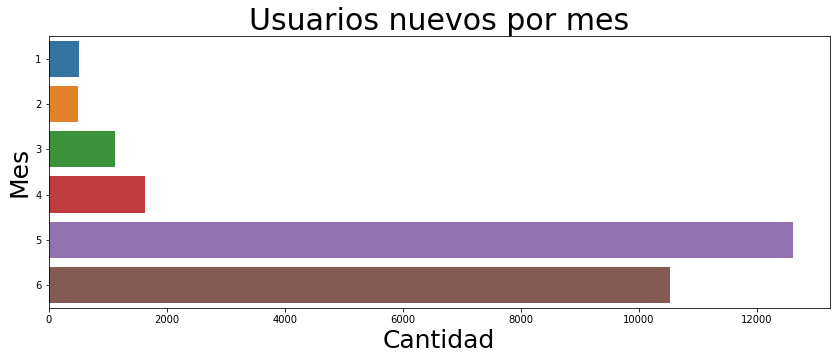

In [127]:
#usuarios_nuevos_por_mes.plot(kind='barh')
plt.figure(figsize=(14, 5))
g = sns.barplot(x=usuarios_nuevos_por_mes.values, y=usuarios_nuevos_por_mes.index, orient='h')
g.set_title("Usuarios nuevos por mes", fontsize=30)
g.set_xlabel("Cantidad", fontsize=25)
g.set_ylabel("Mes", fontsize=25)

In [8]:
data['staticpage'].value_counts()

CustomerService                      1528
AboutUs                               443
FaqEcommerce                          347
Quiosks                               326
trust-trocafone                       243
galaxy-s8                             167
TermsAndConditionsReturnEcommerce     156
how-to-sell                            96
Conditions                             89
how-to-buy                             86
TermsAndConditionsEcommerce            59
club-trocafone                         46
PrivacyEcommerce                        9
black_friday                            3
Name: staticpage, dtype: int64

Separar segun sistema operativo

In [27]:
data['operating_system_version'].value_counts()

Windows 7             19675
Windows 10            17110
Android 7              9964
Android 6.0.1          7805
Android 6              6871
Android 5.1.1          4123
Android 7.1.1          3325
Windows 8.1            2781
Android 5.0.2          1640
Android 4.4.2          1402
iOS 11.3               1345
Android 4.4.4          1288
Android 5.1            1269
Android 8               973
Android 5.0.1           746
iOS 10.3.3              738
Windows 8               732
Windows XP              613
Android 4.2.2           566
Android 4.1.2           519
Android 5               321
Android 4.3             318
Linux                   293
iOS 11.2.6              286
iOS 9.3.5               268
Windows Phone 10        252
iOS 11.4                231
Windows Phone 8.1       200
iOS 11.2.5              147
Android 7.1.2           141
                      ...  
Mac OS X 10.7.5           2
Mac OS X 10.10            2
iOS 8.4                   2
iOS 5.0.1                 2
iOS 11.0.1          

In [10]:
data['campaign_source'].value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64

Text(0,0.5,'Origen de la campaña')

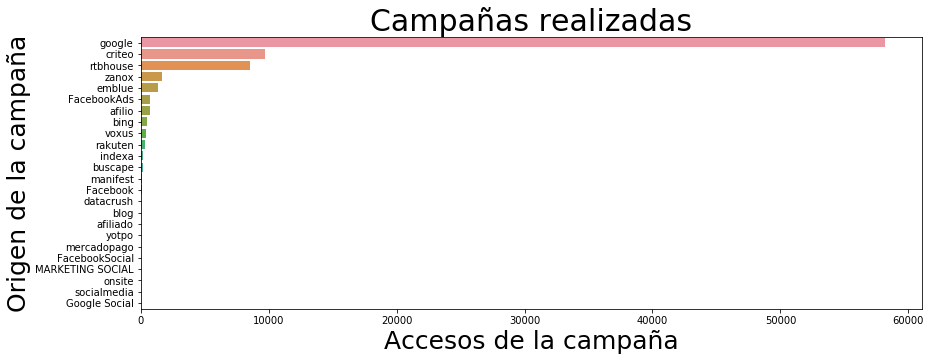

In [48]:
campaigns = data['campaign_source'].value_counts()
plt.figure(figsize=(14, 5))
g = sns.barplot(x=campaigns.values, y=campaigns.index, orient='h')
g.set_title("Campañas realizadas", fontsize=30)
g.set_xlabel("Accesos de la campaña", fontsize=25)
g.set_ylabel("Origen de la campaña", fontsize=25)

In [12]:
sin_google = data[ data['campaign_source'] != 'google']
sin_google['campaign_source'].value_counts()

criteo              9694
rtbhouse            8550
zanox               1673
emblue              1352
FacebookAds          764
afilio               692
bing                 484
voxus                432
rakuten              310
indexa               154
buscape              141
manifest             126
Facebook              77
datacrush             60
blog                  37
afiliado              34
yotpo                 25
mercadopago           18
FacebookSocial         8
MARKETING SOCIAL       7
onsite                 3
socialmedia            1
Google Social          1
Name: campaign_source, dtype: int64

Text(0,0.5,'Origen de la campaña')

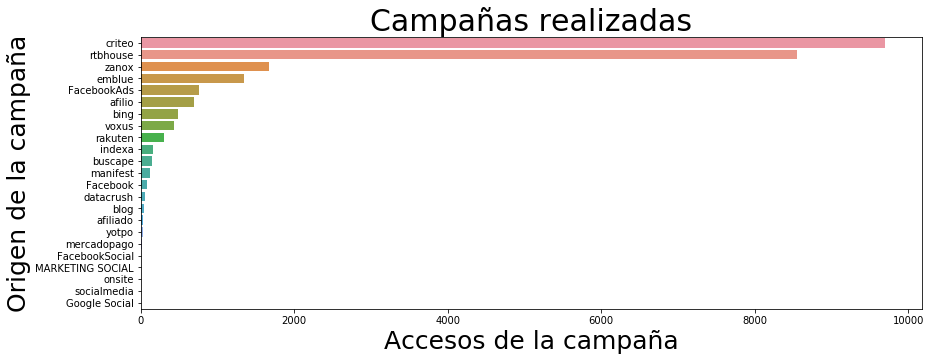

In [15]:
camp_sin_google = sin_google['campaign_source'].value_counts()
plt.figure(figsize=(14, 5))
g = sns.barplot(x=camp_sin_google.values, y=camp_sin_google.index, orient='h')
g.set_title("Campañas realizadas", fontsize=30)
g.set_xlabel("Accesos de la campaña", fontsize=25)
g.set_ylabel("Origen de la campaña", fontsize=25)

In [17]:
campaign_source_success = data[['campaign_source', 'event', 'month']] 

In [22]:
success_campaigns = campaign_source_success.groupby('campaign_source')['event'].count()
success_campaigns

campaign_source
Facebook               77
FacebookAds           764
FacebookSocial          8
Google Social           1
MARKETING SOCIAL        7
afiliado               34
afilio                692
bing                  484
blog                   37
buscape               141
criteo               9694
datacrush              60
emblue               1352
google              58153
indexa                154
manifest              126
mercadopago            18
onsite                  3
rakuten               310
rtbhouse             8550
socialmedia             1
voxus                 432
yotpo                  25
zanox                1673
Name: event, dtype: int64

Text(0,0.5,'Origen de la campaña')

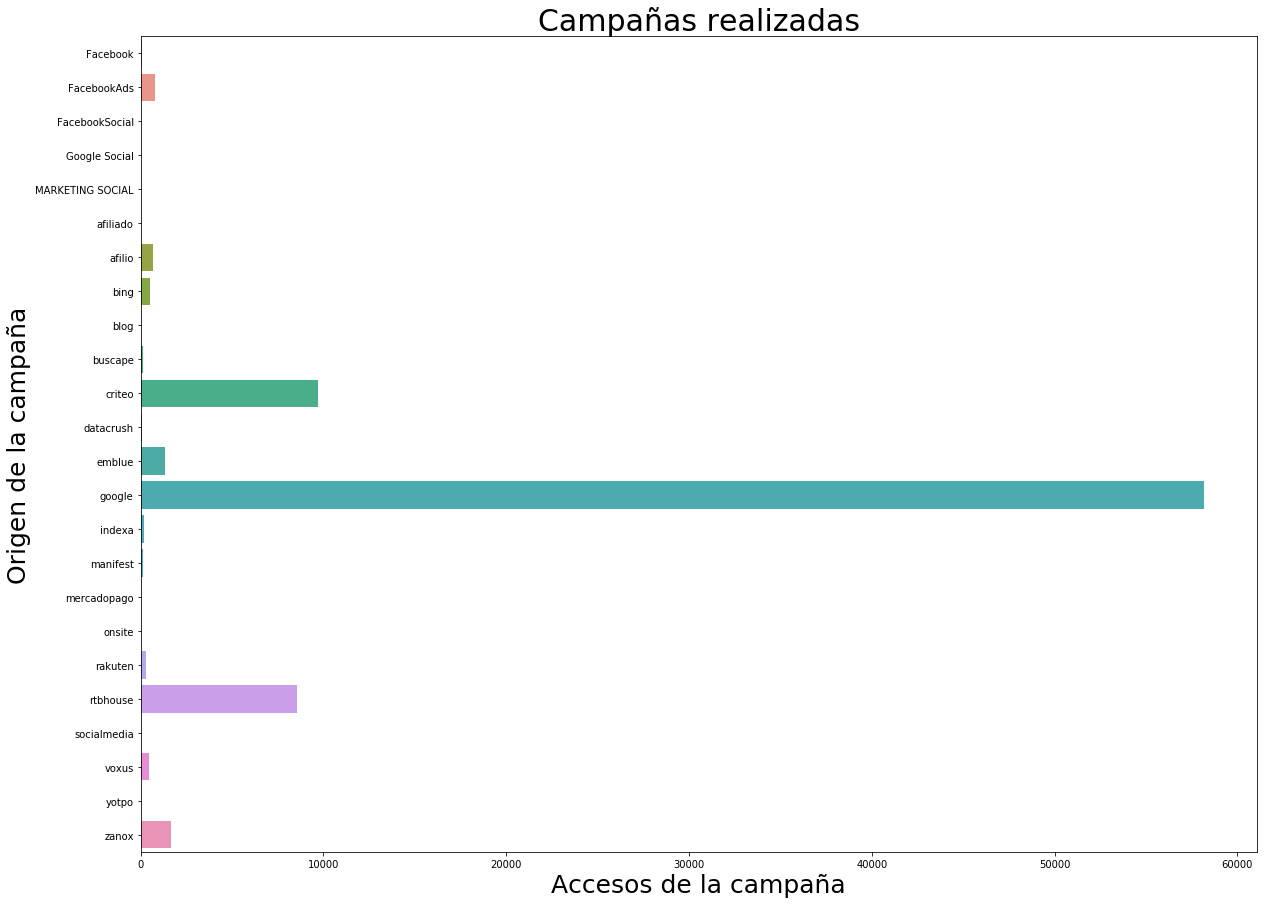

In [71]:
plt.figure(figsize=(20, 15))
g = sns.barplot(x=success_campaigns.values, y=success_campaigns.index, orient='h')
g.set_title("Campañas realizadas", fontsize=30)
g.set_xlabel("Accesos de la campaña", fontsize=25)
g.set_ylabel("Origen de la campaña", fontsize=25)

Text(0,0.5,'Pledged (log)')

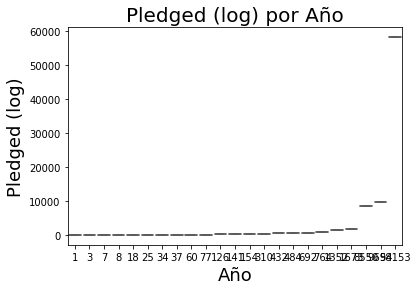

In [72]:
#boxplot
g = sns.boxplot(x=success_campaigns.values, y=success_campaigns.index, 
                     data=success_campaigns, palette="hls")
g.set_title("Pledged (log) por Año", fontsize=20)
g.set_xlabel("Año", fontsize=18)
g.set_ylabel("Pledged (log)", fontsize=18)

In [110]:
relacion_campaña_venta = data[['person', 'event', 'month', 'day']]
#relacion_campaña_venta = relacion_campaña_venta[(relacion_campaña_venta['event'] == 'conversion' || (relacion_campaña_venta['event'] == 'ad_hit_campaign')]
rcv_grouped = relacion_campaña_venta.groupby(['person','month', 'day'])['event'].value_counts()
#relacion_campaña_venta['ad campaign hit'] = relacion_campaña_venta[ relacion_campaña_venta['event'] == ]
rcv_grouped

person    month  day  event            
0004b0a2  5      31   ad campaign hit       1
                      checkout              1
                      viewed product        1
                      visited site          1
0006a21a  5      29   ad campaign hit       1
                      checkout              1
                      viewed product        1
                      visited site          1
000a54b2  4      9    brand listing         2
                      ad campaign hit       1
                      generic listing       1
                      search engine hit     1
                      viewed product        1
                      visited site          1
          5      24   viewed product       18
                      brand listing         4
                      generic listing       4
                      ad campaign hit       1
                      checkout              1
                      search engine hit     1
                      visited site      

In [24]:
relacion_campaña_venta = data[['person', 'event', 'month', 'day']]
#relacion_campaña_venta = relacion_campaña_venta[(relacion_campaña_venta['event'] == 'conversion' || (relacion_campaña_venta['event'] == 'ad_hit_campaign')]
rcv_grouped2 = relacion_campaña_venta.groupby(['person','event', 'month'])['day'].value_counts()
#relacion_campaña_venta['ad campaign hit'] = relacion_campaña_venta[ relacion_campaña_venta['event'] == ]
rcv_grouped2

person    event              month  day
0004b0a2  ad campaign hit    5      31      1
          checkout           5      31      1
          viewed product     5      31      1
          visited site       5      31      1
0006a21a  ad campaign hit    5      29      1
          checkout           5      29      1
          viewed product     5      29      1
          visited site       5      29      1
000a54b2  ad campaign hit    4      9       1
                             5      24      1
          brand listing      4      9       2
                             5      24      4
          checkout           5      24      1
          generic listing    4      9       1
                             5      24      4
          search engine hit  4      9       1
                             5      24      1
          viewed product     4      9       1
                             5      24     18
          visited site       4      9       1
                             5      24  

In [25]:
#Buscar como poner falso en columnas
#relacion_campaña_venta.loc[:, relacion_campaña_venta['event'] == 'ad campaign hit']

In [26]:
#pd.crosstab(rcv_grouped, rcv_grouped)

In [8]:
relacion_campaña_venta2 = data[['person', 'event', 'month', 'day']]
relacion_campaña_venta2 = relacion_campaña_venta2[ (relacion_campaña_venta2.event == 'conversion') | 
                                                  (relacion_campaña_venta2.event == 'ad campaign hit') |
                                                  (relacion_campaña_venta2.event == 'checkout') ]
relacion_campaña_venta2['event'].value_counts()

ad campaign hit    82827
checkout           33735
conversion          1172
Name: event, dtype: int64

In [51]:
conversions = relacion_campaña_venta2[ (relacion_campaña_venta2['event'] == 'conversion') & (relacion_campaña_venta2['person'] == '0004b0a2') ]
conversions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
person    0 non-null object
event     0 non-null object
month     0 non-null int64
day       0 non-null int64
dtypes: int64(2), object(2)
memory usage: 0.0+ bytes


In [82]:
relacion_campaña_venta2.head(3)

,person,event,month,day
0,0004b0a2,ad campaign hit,5,31
3,0004b0a2,checkout,5,31
6,0006a21a,ad campaign hit,5,29


In [20]:
rcv = relacion_campaña_venta2.groupby(['person','month', 'day'])
rcv['event'].value_counts().unstack()
#rcv.count()
#rcv = relacion_campaña_venta2.groupby(['person','month', 'day', 'event']).count()
#rcv

event               ad campaign hit  checkout  conversion
person   month day                                       
0004b0a2 5     31               1.0       1.0         NaN
0006a21a 5     29               1.0       1.0         NaN
000a54b2 4     9                1.0       NaN         NaN
         5     24               1.0       1.0         NaN
00184bf9 4     6                NaN       2.0         NaN
         5     4                NaN       1.0         NaN
               17               NaN       1.0         NaN
0019c395 5     17               2.0       1.0         NaN
001bb7eb 6     8                1.0       1.0         NaN
001f1653 5     29               1.0       1.0         NaN
00204059 1     31               1.0       NaN         NaN
         2     1                4.0       1.0         NaN
               2                1.0       NaN         NaN
               15               NaN       1.0         NaN
               16               NaN       2.0         NaN
         3     20               NaN       NaN         1.0
         5     19               NaN       1.0         NaN
0020f73c 6     12               NaN       1.0         NaN
0024a82b 5     30               1.0       1.0         NaN
0024ad28 5     24               2.0       NaN         NaN
               28               1.0       1.0         NaN
00269e77 5     14               1.0       NaN         NaN
         6     5                2.0       NaN         NaN
               7                2.0       1.0         NaN
0026fd72 6     14               1.0       1.0         NaN
0027c344 6     12               3.0       1.0         NaN
00283a9e 6     2                1.0       NaN         NaN
               15               1.0       1.0         NaN
002932b1 5     3                1.0       NaN         NaN
               29               2.0       NaN         NaN
...                             ...       ...         ...
ffd0be6e 5     31               3.0       1.0         NaN
ffd33f13 5     21               1.0       1.0         NaN
ffd85102 5     17               5.0       1.0         NaN
ffd9b5f9 5     31               2.0       1.0         NaN
ffd9e195 5     21               1.0       1.0         NaN
ffdcf469 5     30               NaN       1.0         NaN
ffe006ea 5     16               NaN       1.0         NaN
ffe129fe 6     4                2.0       1.0         NaN
ffe1bfe7 5     25               2.0       1.0         NaN
ffe1f855 6     15               2.0       1.0         NaN
ffe226f0 6     8                2.0       1.0         NaN
ffe741db 5     17               1.0       1.0         NaN
ffeaaa70 5     15               3.0       NaN         NaN
         6     2                2.0       1.0         NaN
ffeb3a03 6     11               1.0       NaN         NaN
               13               1.0       1.0         NaN
ffef9da6 6     8                1.0       1.0         NaN
fff0e00c 1     24               1.0       NaN         NaN
         5     30               NaN       1.0         NaN
fff225f8 6     8                2.0       1.0         NaN
fff229f7 6     7                1.0       1.0         NaN
fff568f7 5     17               1.0       NaN         NaN
               21               1.0       1.0         NaN
fff60213 5     25               1.0       1.0         NaN
fff99b85 5     28               1.0       1.0         NaN
ffff8106 5     15               1.0       1.0         NaN
ffffa8d1 5     18               1.0       NaN         NaN
         6     9                1.0       NaN         NaN
               11               1.0       1.0         NaN
ffffac8a 6     4                1.0       1.0         NaN

[52810 rows x 3 columns]

In [16]:
rcv['ad campaign hit'] = relacion_campaña_venta2.groupby(['person','month', 'day'])

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [24]:
city_dev = data[['person', 'sku', 'model', 'event', 'color', 'city', 'region', 'search_term','device_type', 'staticpage']]
city_dev.head(20)

,person,sku,model,event,color,city,region,search_term,device_type,staticpage
0,0004b0a2,NaN,NaN,ad campaign hit,NaN,NaN,NaN,NaN,NaN,NaN
1,0004b0a2,NaN,NaN,visited site,NaN,Camaragibe,Pernambuco,NaN,Smartphone,NaN
2,0004b0a2,2694.0,iPhone 5s,viewed product,Cinza espacial,NaN,NaN,NaN,NaN,NaN
3,0004b0a2,2694.0,iPhone 5s,checkout,Cinza espacial,NaN,NaN,NaN,NaN,NaN
4,0006a21a,15338.0,Samsung Galaxy S8,viewed product,Dourado,NaN,NaN,NaN,NaN,NaN
5,0006a21a,NaN,NaN,visited site,NaN,Rio de Janeiro,Rio de Janeiro,NaN,Smartphone,NaN
6,0006a21a,NaN,NaN,ad campaign hit,NaN,NaN,NaN,NaN,NaN,NaN
7,0006a21a,15338.0,Samsung Galaxy S8,checkout,Dourado,NaN,NaN,NaN,NaN,NaN
8,000a54b2,NaN,NaN,generic listing,NaN,NaN,NaN,NaN,NaN,NaN
9,000a54b2,NaN,NaN,visited site,NaN,Rio de Janeiro,Rio de Janeiro,NaN,Computer,NaN


In [37]:
group = city_dev.groupby(['person'])['device_type']

In [35]:
city_dev.groupby(['device_type'])['person'].value_counts()

device_type  person  
Computer     5af7e2bc    157
             ca3ff2f0    148
             2d5a84c1    142
             f3a682fb    120
             71492f2b    103
             a36c84e6    102
             3eb8d8c4    100
             d9251b63    100
             fc16afa3     96
             5f25cb5d     89
             249fc5ce     84
             d7e60792     80
             c9162895     77
             4ba1247a     76
             b7f832b9     76
             ff9dc4b8     76
             7608c6e2     72
             c501ff3a     72
             f0887975     72
             a7d3181e     71
             74725078     70
             b7db0194     70
             d32e7c2e     65
             9c0f5caf     64
             496184cd     63
             dfb2ba6c     62
             1a959985     61
             285101a1     61
             abc4405c     60
             e17a706c     60
                        ... 
Unknown      b64d66c7      2
             f52c7487      2
             f9ba6fb2

In [40]:
group.get_group('5af7e2bc')

344719         NaN
344720    Computer
344721         NaN
344722    Computer
344723         NaN
344724         NaN
344725         NaN
344726    Computer
344727         NaN
344728    Computer
344729         NaN
344730         NaN
344731         NaN
344732         NaN
344733         NaN
344734         NaN
344735         NaN
344736         NaN
344737         NaN
344738         NaN
344739         NaN
344740         NaN
344741         NaN
344742         NaN
344743         NaN
344744         NaN
344745         NaN
344746         NaN
344747         NaN
344748         NaN
            ...   
346462         NaN
346463         NaN
346464         NaN
346465         NaN
346466         NaN
346467         NaN
346468         NaN
346469         NaN
346470         NaN
346471         NaN
346472         NaN
346473         NaN
346474         NaN
346475         NaN
346476         NaN
346477         NaN
346478         NaN
346479    Computer
346480         NaN
346481    Computer
346482         NaN
346483      

In [34]:
city_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 9 columns):
person         1011288 non-null object
sku            563838 non-null object
model          564284 non-null object
event          1011288 non-null object
color          563836 non-null object
city           87378 non-null object
region         87378 non-null object
search_term    48967 non-null object
staticpage     3598 non-null object
dtypes: object(9)
memory usage: 69.4+ MB


In [35]:
city_dev['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [45]:
#staticpage = data[ data['event'] == 'staticpage']
#staticpage.groupby(['staticpage', 'month'])['day'].count()

In [37]:
user_city = data[['person', 'event', 'city', 'region', 'month', 'day', 'hour']]
user_city.head(10)

,person,event,city,region,month,day,hour
0,0004b0a2,ad campaign hit,NaN,NaN,5,31,23
1,0004b0a2,visited site,Camaragibe,Pernambuco,5,31,23
2,0004b0a2,viewed product,NaN,NaN,5,31,23
3,0004b0a2,checkout,NaN,NaN,5,31,23
4,0006a21a,viewed product,NaN,NaN,5,29,13
5,0006a21a,visited site,Rio de Janeiro,Rio de Janeiro,5,29,13
6,0006a21a,ad campaign hit,NaN,NaN,5,29,13
7,0006a21a,checkout,NaN,NaN,5,29,13
8,000a54b2,generic listing,NaN,NaN,4,9,20
9,000a54b2,visited site,Rio de Janeiro,Rio de Janeiro,4,9,20


In [127]:
user_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 8 columns):
person    1011288 non-null object
event     1011288 non-null object
city      87378 non-null object
region    87378 non-null object
month     1011288 non-null int64
day       1011288 non-null int64
hour      1011288 non-null int64
sku       563838 non-null object
dtypes: int64(3), object(5)
memory usage: 61.7+ MB


In [128]:
user_city['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [157]:
user_city_vp = user_city[ user_city['event'] == 'viewed product']
user_city_vp.head(10)

,person,event,city,region,month,day,hour
2,0004b0a2,viewed product,NaN,NaN,5,31,23
4,0006a21a,viewed product,NaN,NaN,5,29,13
13,000a54b2,viewed product,NaN,NaN,4,9,20
22,000a54b2,viewed product,NaN,NaN,5,24,11
26,000a54b2,viewed product,NaN,NaN,5,24,11
27,000a54b2,viewed product,NaN,NaN,5,24,11
28,000a54b2,viewed product,NaN,NaN,5,24,11
29,000a54b2,viewed product,NaN,NaN,5,24,11
30,000a54b2,viewed product,NaN,NaN,5,24,11
31,000a54b2,viewed product,NaN,NaN,5,24,11


In [126]:
user_city_vp.head(5)

,person,event,city,region,month,day,hour,sku
2,0004b0a2,viewed product,NaN,NaN,5,31,23,2694.0
4,0006a21a,viewed product,NaN,NaN,5,29,13,15338.0
13,000a54b2,viewed product,NaN,NaN,4,9,20,12661.0
22,000a54b2,viewed product,NaN,NaN,5,24,11,10254.0
26,000a54b2,viewed product,NaN,NaN,5,24,11,6581.0


In [137]:
user_city_wn = user_city.dropna()
user_city_wn.head(5)

,person,event,city,region,month,day,hour
1,0004b0a2,visited site,Camaragibe,Pernambuco,5,31,23
5,0006a21a,visited site,Rio de Janeiro,Rio de Janeiro,5,29,13
9,000a54b2,visited site,Rio de Janeiro,Rio de Janeiro,4,9,20
16,000a54b2,visited site,Rio de Janeiro,Rio de Janeiro,5,24,11
45,00184bf9,visited site,Ribeirão Preto,Sao Paulo,4,6,5


In [109]:
city_by_user = pd.DataFrame()
city_by_user['city'] = data['city'].dropna(axis=0)
#city_by_user['city'] = city_by_user['city'].dropna(axis=0)
city_by_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 1 to 1011284
Data columns (total 1 columns):
city    87378 non-null object
dtypes: object(1)
memory usage: 1.3+ MB


In [145]:
#Ver que no este guardando duplicados
city_by_user['person'] = user_city_wn['person']
city_by_user['region'] = user_city_wn['region']
city_by_user['month'] = user_city_wn['month']
city_by_user['day'] = user_city_wn['day']

In [156]:
city_by_user.head(5)

,city,person,region,month,day,sku
1,Camaragibe,0004b0a2,Pernambuco,5,31,NaN
5,Rio de Janeiro,0006a21a,Rio de Janeiro,5,29,NaN
9,Rio de Janeiro,000a54b2,Rio de Janeiro,4,9,NaN
16,Rio de Janeiro,000a54b2,Rio de Janeiro,5,24,NaN
45,Ribeirão Preto,00184bf9,Sao Paulo,4,6,NaN


In [23]:
data.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,country,device_type,screen_resolution,operating_system_version,browser_version,year,month,day,weekday,hour
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,31,Thursday,23
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018,5,31,Thursday,23
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,31,Thursday,23
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,31,Thursday,23
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,29,Tuesday,13


In [7]:
modelos = data[['model', 'person', 'device_type']]
modelos = modelos.dropna() 
modelos = modelos.drop_duplicates(subset=['model', 'person'])
modelos

,model,person,device_type


Importanteeeeee, segui con esto

In [6]:
iphone = modelos[['model', 'person']]
iphone['iPhone'] = modelos['model'].str.contains('iPhone', case=False)
iphone = iphone[ iphone['iPhone'] == True] 
iphone['4s'] = iphone['model'].str.contains('4s', case=False)
iphone['4g'] = iphone['model'].str.contains('4g', case=False) 
iphone['5'] = iphone['model'].str.contains('5', case=False) 
iphone['5s'] = iphone['model'].str.contains('5s', case=False) 
iphone['5c'] = iphone['model'].str.contains('5c', case=False)
iphone['6'] = iphone['model'].str.contains('6', case=False) 
iphone['6 plus'] = iphone['model'].str.contains('6 plus', case=False) 
iphone['6s'] = iphone['model'].str.contains('6s', case=False) 
iphone['6s Plus'] = iphone['model'].str.contains('6s plus', case=False) 
iphone['SE'] = iphone['model'].str.contains('SE', case=False) 
iphone['7'] = iphone['model'].str.contains('7', case=False) 
iphone['7 plus'] = iphone['model'].str.contains('7 plus', case=False) 
iphone['8'] = iphone['model'].str.contains('8', case=False) 
iphone['8 plus'] = iphone['model'].str.contains('8 plus', case=False) 
iphone['x'] = iphone['model'].str.contains('x', case=False) 
iphone.head(10)

,model,person,iPhone,4s,4g,5,5s,5c,6,6 plus,6s,6s Plus,SE,7,7 plus,8,8 plus,x
2,iPhone 5s,0004b0a2,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
22,iPhone 7 Plus,000a54b2,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
26,iPhone 6S,000a54b2,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
48,iPhone 4G,00184bf9,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
65,iPhone 4S,00184bf9,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
89,iPhone 5c,00184bf9,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
104,iPhone 7,001bb7eb,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
109,iPhone 6,001bb7eb,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
121,iPhone 5s,00204059,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
124,iPhone 5c,00204059,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False


In [32]:
iphone.groupby(['person']).sum()

,iPhone,4s,4g,5,5s,5c,6,6 plus,6s,6s Plus,SE,7,7 plus,8,8 plus,x
person,,,,,,,,,,,,,,,,
0004b0a2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000a54b2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
00184bf9,3.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001bb7eb,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
00204059,4.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0020f73c,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0024a82b,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00269e77,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0027c344,3.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
modelos['iPhone'] = modelos['model'].str.contains('iPhone', case=False)
modelos['samsung'] = modelos['model'].str.contains('samsung', case=False)
modelos['motorola'] = modelos['model'].str.contains('motorola', case=False)
modelos['lg'] = modelos['model'].str.contains('lg', case=False)
modelos['quantum'] = modelos['model'].str.contains('quantum', case=False)
modelos['blackberry'] = modelos['model'].str.contains('blackberry', case=False)
modelos['asus'] = modelos['model'].str.contains('asus', case=False)

In [11]:
modelos['blackberry'].value_counts()

False    113606
True          1
Name: blackberry, dtype: int64

In [16]:
modelos['iPhone'].value_counts()

False    76967
True     36640
Name: iPhone, dtype: int64

In [17]:
modelos['samsung'].value_counts()

False    63363
True     50244
Name: samsung, dtype: int64

In [12]:
modelos['lg'].value_counts()

False    109701
True       3906
Name: lg, dtype: int64

In [13]:
modelos['quantum'].value_counts()

False    113275
True        332
Name: quantum, dtype: int64

In [14]:
modelos['asus'].value_counts()

False    112671
True        936
Name: asus, dtype: int64

In [15]:
modelos['motorola'].value_counts()

False    97092
True     16515
Name: motorola, dtype: int64

In [12]:
samsung = modelos[['model', 'person']]
samsung['samsung'] = modelos['model'].str.contains('samsung', case=False)

#samsung = samsung[ samsung['samsung'] == True] 
#samsung['model'].value_counts()


,model,person,samsung


In [22]:
conversiones = data[ data['event'] == 'conversion']
conversiones.info()
#grouped = conversiones.groupby(['condition', 'model'])['person'].count()
#grouped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 220 to 1008943
Data columns (total 28 columns):
timestamp                   1172 non-null datetime64[ns]
event                       1172 non-null object
person                      1172 non-null object
url                         0 non-null object
sku                         1172 non-null object
model                       1172 non-null object
condition                   1172 non-null object
storage                     1172 non-null object
color                       1172 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     

In [20]:
condition_values = conversiones['condition'].value_counts()
condition_values

Bom                   538
Muito Bom             352
Excelente             258
Bom - Sem Touch ID     22
Novo                    2
Name: condition, dtype: int64

Text(0,0.5,'Cantidad')

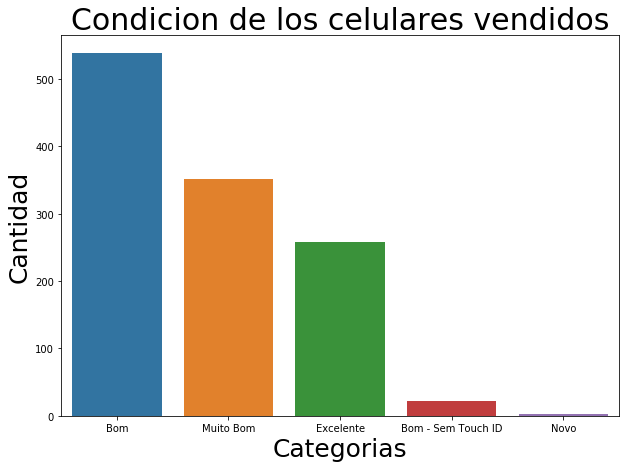

In [21]:
plt.figure(figsize=(10, 7))
g = sns.barplot(x=condition_values.index, y=condition_values.values)
g.set_title("Condicion de los celulares vendidos", fontsize=30)
g.set_xlabel("Categorias", fontsize=25)
g.set_ylabel("Cantidad", fontsize=25)

In [47]:
data['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [56]:
sp = data[ data['event'] == 'brand listing']
sp.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,country,device_type,screen_resolution,operating_system_version,browser_version,year,month,day,weekday,hour
12,2018-04-09 20:12:53,brand listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"5075,12536,12520,12661,12506,12549,10449,9175,...",...,NaN,NaN,NaN,NaN,NaN,2018,4,9,Monday,20
14,2018-04-09 20:13:20,brand listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"5075,12536,12520,12661,12506,12549,10449,9175,...",...,NaN,NaN,NaN,NaN,NaN,2018,4,9,Monday,20
20,2018-05-24 11:26:53,brand listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"8499,8485,8471,8443",...,NaN,NaN,NaN,NaN,NaN,2018,5,24,Thursday,11
24,2018-05-24 11:28:10,brand listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"2694,2711,6011,5904,6931,2830,6023,10294,3647,...",...,NaN,NaN,NaN,NaN,NaN,2018,5,24,Thursday,11
25,2018-05-24 11:28:36,brand listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"6931,6888,6847,6957,6902,6832,6581,6875,8965,8...",...,NaN,NaN,NaN,NaN,NaN,2018,5,24,Thursday,11


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 28 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region            

In [ ]:
sns.set(style="ticks", color_codes=True)
#data = sns.load_dataset("data")
g = sns.FacetGrid(data, col="event", row="person")

In [47]:
m = pd.DataFrame()
m = data[['model', 'event', 'person']]
m = m.dropna().drop_duplicates(['model','person'])

def juntar(x): 
    x['modelo'] = x['mod'] + " " +x['mod2'] 

#m['marca'] = m['model'].str.partition(pat=' ', expand=True)
m[['marca','mod', 'mod2', 'mod3', 'n', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6']] = m['model'].str.split(" ", expand=True)
m['modelo'] = m['mod'] + " " +m['mod2'] 
m['modelo2'] = m['modelo'] + " " +m['mod3']
#juntar(m)
m
#df[‘model’] = df.name.str.split(" ", expand=True)

,model,event,person,marca,mod,mod2,mod3,n,n1,n2,n3,n4,n5,n6,modelo,modelo2
2,iPhone 5s,viewed product,0004b0a2,iPhone,5s,None,None,None,None,None,None,None,None,None,NaN,NaN
4,Samsung Galaxy S8,viewed product,0006a21a,Samsung,Galaxy,S8,None,None,None,None,None,None,None,None,Galaxy S8,NaN
13,Motorola Moto Z Play,viewed product,000a54b2,Motorola,Moto,Z,Play,None,None,None,None,None,None,None,Moto Z,Moto Z Play
22,iPhone 7 Plus,viewed product,000a54b2,iPhone,7,Plus,None,None,None,None,None,None,None,None,7 Plus,NaN
26,iPhone 6S,viewed product,000a54b2,iPhone,6S,None,None,None,None,None,None,None,None,None,NaN,NaN
48,iPhone 4G,viewed product,00184bf9,iPhone,4G,None,None,None,None,None,None,None,None,None,NaN,NaN
65,iPhone 4S,viewed product,00184bf9,iPhone,4S,None,None,None,None,None,None,None,None,None,NaN,NaN
84,Samsung Galaxy J5,viewed product,00184bf9,Samsung,Galaxy,J5,None,None,None,None,None,None,None,None,Galaxy J5,NaN
89,iPhone 5c,viewed product,00184bf9,iPhone,5c,None,None,None,None,None,None,None,None,None,NaN,NaN
98,Samsung Galaxy J5,viewed product,0019c395,Samsung,Galaxy,J5,None,None,None,None,None,None,None,None,Galaxy J5,NaN


Text(0,0.5,'Modelo')

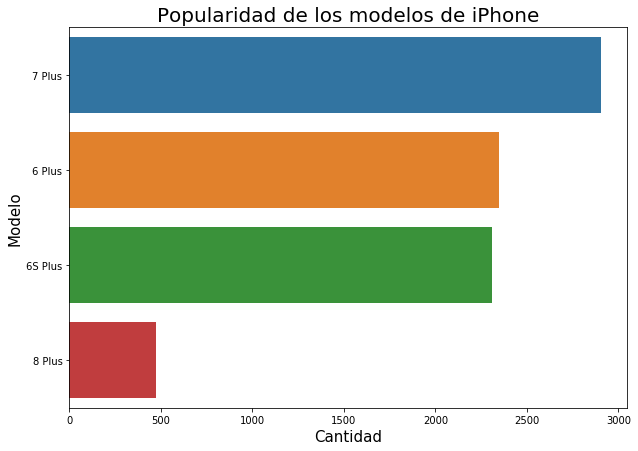

In [62]:
i = m[ m['marca']=='iPhone']

i = i['modelo'].value_counts()
plt.figure(figsize=(10, 7))
g = sns.barplot(x=i.values, y=i.index, orient='h')
g.set_title("Popularidad de los modelos de iPhone", fontsize=20)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Modelo", fontsize=15)

Text(0,0.5,'Modelo')

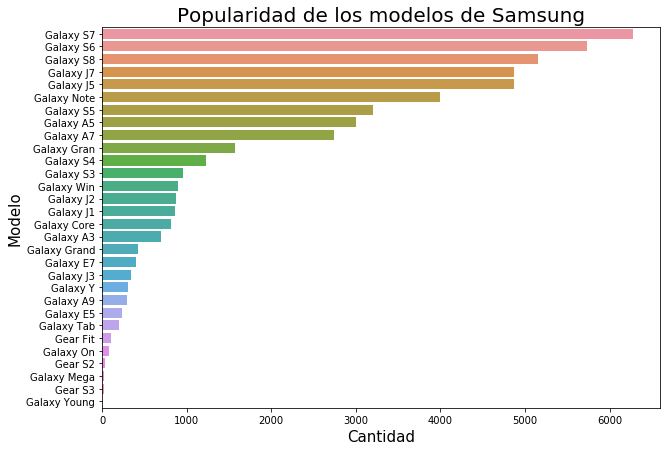

In [60]:
s = m[ m['marca']=='Samsung']

s = s['modelo'].value_counts()
plt.figure(figsize=(10, 7))
g = sns.barplot(x=s.values, y=s.index, orient='h')
g.set_title("Popularidad de los modelos de Samsung", fontsize=20)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Modelo", fontsize=15)

Text(0,0.5,'Modelo')

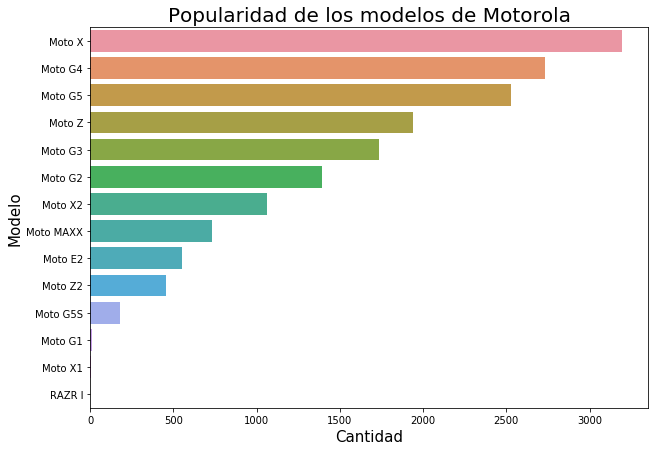

In [61]:
moto = m[ m['marca']=='Motorola']

mo = moto['modelo'].value_counts()
plt.figure(figsize=(10, 7))
g = sns.barplot(x=mo.values, y=mo.index, orient='h')
g.set_title("Popularidad de los modelos de Motorola", fontsize=20)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Modelo", fontsize=15)

In [55]:
moto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16515 entries, 13 to 1011166
Data columns (total 16 columns):
model      16515 non-null object
event      16515 non-null object
person     16515 non-null object
marca      16515 non-null object
mod        16515 non-null object
mod2       16515 non-null object
mod3       14776 non-null object
n          4313 non-null object
n1         1334 non-null object
n2         0 non-null object
n3         0 non-null object
n4         0 non-null object
n5         0 non-null object
n6         0 non-null object
modelo     16515 non-null object
modelo2    14776 non-null object
dtypes: object(16)
memory usage: 2.1+ MB


In [41]:
m['marca'].value_counts()

iPhone        256585
Samsung       218127
Motorola       63518
LG              9724
Sony            7025
Lenovo          4779
Asus            2091
iPad            1914
Quantum          520
Blackberry         1
Name: marca, dtype: int64

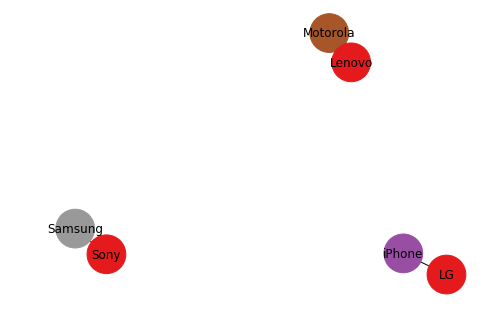

In [44]:
# libraries
import networkx as nx
 
# Build a dataframe with your connections
grouped_by_brand = pd.DataFrame({'from':['iPhone','Samsung', 'Motorola'], 'to':['LG', 'Sony', 'Lenovo']})
#df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['iPhone','Samsung', 'Motorola'], 'myvalue':['LG', 'Sony', 'Lenovo'] })
 
# Build your graph
G=nx.from_pandas_edgelist(grouped_by_brand, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)


In [13]:
data.groupby(['month','event'])['person'].count().unstack()

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
month,,,,,,,,,,,
1,1702,1953,331,63,1721,32,1003,1341,138,8851,2135
2,2340,3101,441,74,2038,22,1338,1507,105,14130,2790
3,6872,8489,1386,265,5553,69,3287,4010,449,39666,7247
4,10888,15153,1965,316,9901,136,5641,6761,653,65944,12650
5,38108,44991,15645,351,30472,89,24259,26078,1507,253312,40137
6,22917,24948,13967,103,17849,100,15429,16376,746,147028,22419


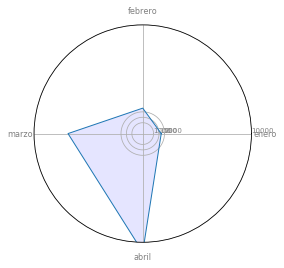

In [15]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['ach', 'bl', 'ch', 'co','gl'],
'enero': [1702, 1953, 331, 63, 1721],
'febrero': [2340, 3101, 441, 74, 2038],
'marzo': [6872, 8489, 1386, 265, 5553],
'abril': [10888, 15153, 1965, 316, 9901],
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1000,1500,2000], ["1000", "1500", "2000"], color="grey", size=7)
plt.ylim(0,2500)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


ValueError: num must be 1 <= num <= 4, not 5

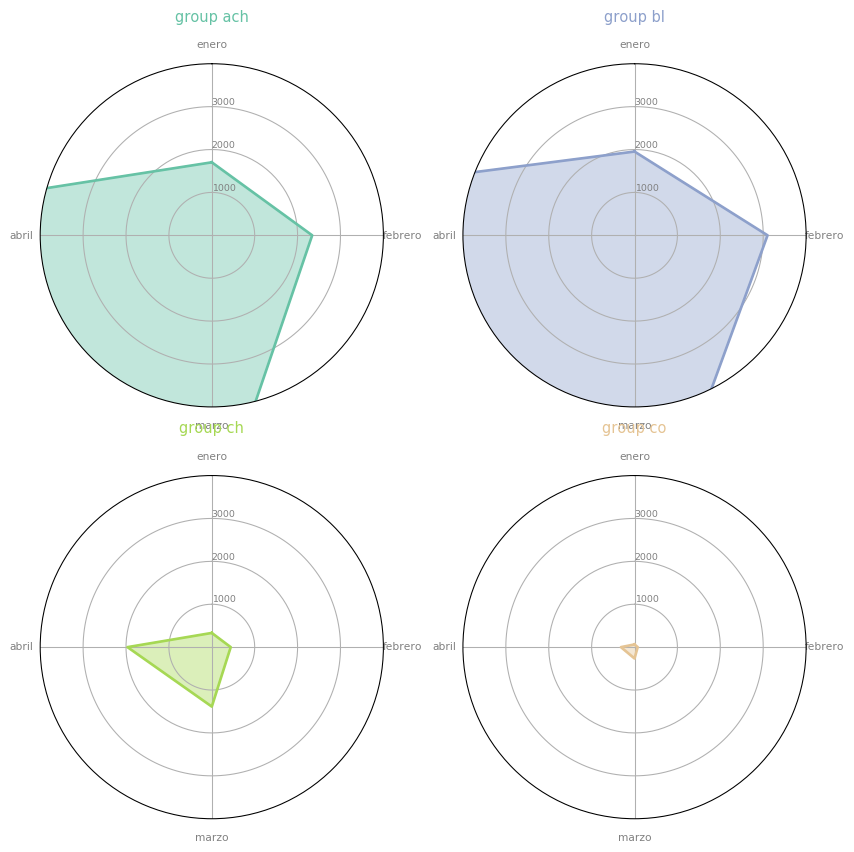

In [16]:
# Libraries
 
# Set data
df = pd.DataFrame({
'group': ['ach', 'bl', 'ch', 'co','gl'],
'enero': [1702, 1953, 331, 63, 1721],
'febrero': [2340, 3101, 441, 74, 2038],
'marzo': [6872, 8489, 1386, 265, 5553],
'abril': [10888, 15153, 1965, 316, 9901],
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
    
    # number of variable
    categories = list(df)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1000,2000,3000], ["1000","2000","3000"], color="grey", size=7)
    plt.ylim(0,4000)
 
    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    return 
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row)) 


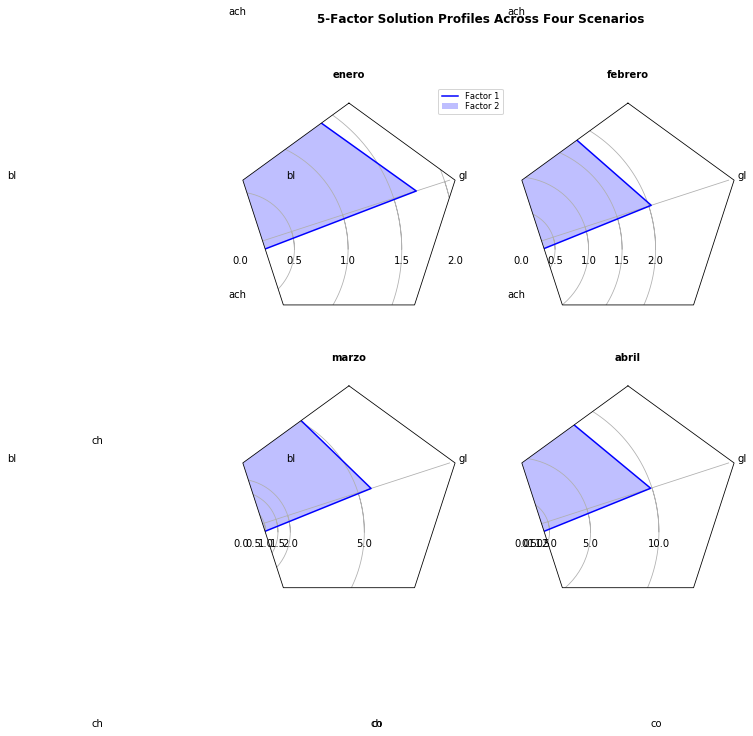

In [24]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
   
    data = [
        ['ach', 'bl', 'ch', 'co', 'gl'],
        ('enero', [
            [1.702, 1.953, 0.331, 0.063, 1.721],
            ]),
        ('febrero', [
            [2.340, 3.101, 0.441, 0.074, 2.038]]),
        ('marzo', [
             [6.872, 8.489, 1.386, 0.265, 5.553]
            ]),
        ('abril', [
            [10.888, 15.153, 1.965, 0.316, 9.901]
            ])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([0,0.5, 1, 1.5, 2, 5, 10])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()